In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 (a)
**Transition Probability Matrix**

In [3]:
P = np.matrix([[0.2,0.7,0.1],[0.2,0.5,0.3],[0.2,0.4,0.4]])
P

matrix([[0.2, 0.7, 0.1],
        [0.2, 0.5, 0.3],
        [0.2, 0.4, 0.4]])

# 1 (b)
**Simulate one realization of the chain.**

In [5]:
def sim(x, P):
    probs = np.array(P[(x-1),:])[0]
    return np.random.choice([1,2,3], 1, p=probs)

x = np.array([1])
markov_chain = [x]

for i in range(10):
    x = sim(x,P)
    markov_chain.append(x)
    
markov_chain = np.array(markov_chain)
markov_chain

array([[1],
       [2],
       [3],
       [3],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2]])

# 2 (a)
**Theoretically find the stationary distribution $\pi$**

We solve $\pi_\infty^T(P-I) = 0$ subject to the constraint $\pi_1 +\pi_2 +\pi_3 = 1$

In [10]:
P - np.identity(3)

matrix([[-0.8,  0.7,  0.1],
        [ 0.2, -0.5,  0.3],
        [ 0.2,  0.4, -0.6]])

These give the four equations:

$$-0.8\pi_1+0.2\pi_2+0.2\pi_3 = 0$$

$$0.7\pi_1-0.5\pi_2+0.4\pi_3 = 0$$

$$0.1\pi_1+0.3\pi_2-0.6\pi_3 = 0$$

$$\pi_1+\pi_2+\pi_3 = 1$$

Combining (1) and (2), we get:

$$\pi_2 = \frac{23}{9}\pi_1$$

The third equation implies:

$$\pi_3 = \frac{1}{2} \pi_2 + \frac{1}{6}\pi_1$$
$$\implies \pi_3 = \frac{13}{9}\pi_1$$

Lastly, combining these two results with the constraint gives:

$$\pi_1 + \frac{13}{9}\pi_1 + \frac{23}{9}\pi_1 = 1$$
$$\implies \pi_1 = \frac{1}{5} \implies \pi_2 = \frac{23}{45}, \pi_3 = \frac{13}{45}$$

So we have:

$$\pi_\infty = [\frac{1}{5} \space \frac{23}{45} \space \frac{13}{45}]$$

# 2 (b)
**Given some initial distribution $\pi_0$, show $\pi_i \rightarrow \pi_{\infty}$.**

In [18]:
def gen_pi_i(pi_0, i, P):
    P_i = np.linalg.matrix_power(P, i)
    return np.dot(pi_0, P_i)


pi_0 = np.array([0.3, 0.3, 0.4])
for i in range(1,10):
    pi_i = gen_pi_i(pi_0, i, P)
    print(pi_i)

[[0.2  0.52 0.28]]
[[0.2   0.512 0.288]]
[[0.2    0.5112 0.2888]]
[[0.2     0.51112 0.28888]]
[[0.2      0.511112 0.288888]]
[[0.2       0.5111112 0.2888888]]
[[0.2        0.51111112 0.28888888]]
[[0.2        0.51111111 0.28888889]]
[[0.2        0.51111111 0.28888889]]


**Make a plot of $i$ against $||\pi_i - \pi_{\infty}||_2^2$.**

Initial distribution: [0.3 0.3 0.4]


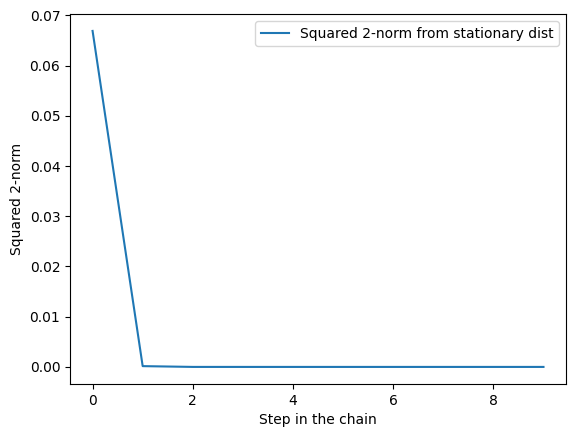

In [28]:
pi_inf = [1/5, 23/45, 13/45]

def diff(pi_i, pi):
    return np.power(np.linalg.norm(pi_i-pi), 2)

def sim_pi(pi_0, P):
    output_dict = {}
    for i in range(10):
        pi_i = gen_pi_i(pi_0, i, P)
        output_dict[i] = diff(pi_i, pi_inf)
    return output_dict

pi_0 = np.array([0.3, 0.3, 0.4])
print(f"Initial distribution: {pi_0}")
res = sim_pi(pi_0, P)
df = pd.DataFrame.from_dict(res, orient='index')
df.columns=["Squared 2-norm from stationary dist"]
ax = df.plot()
ax.set_xlabel("Step in the chain")
ax.set_ylabel("Squared 2-norm");

Initial distribution: [1 0 0]


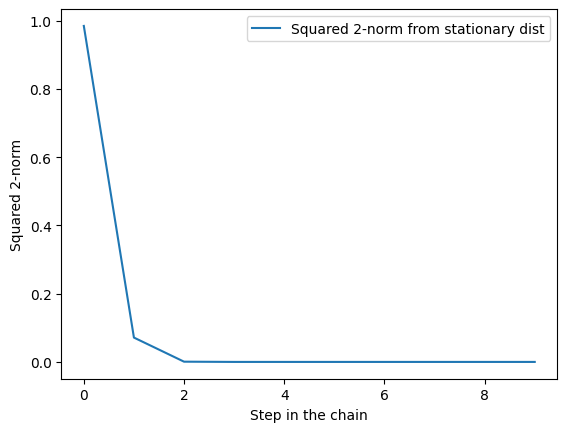

In [26]:
pi_0 = np.array([1,0,0])
print(f"Initial distribution: {pi_0}")
res = sim_pi(pi_0, P)
df = pd.DataFrame.from_dict(res, orient='index')
df.columns=["Squared 2-norm from stationary dist"]
ax = df.plot()
ax.set_xlabel("Step in the chain")
ax.set_ylabel("Squared 2-norm");

# 3 (a)
**Simulate stopping time for absorbing state $X_i = 3$ from $X_0=1$ and $X_0=2$, and plot histograms.**

In [37]:
P_absorb = np.matrix([[0.2,0.7,0.1],[0.2,0.5,0.3],[0,0,1]])
P_absorb

matrix([[0.2, 0.7, 0.1],
        [0.2, 0.5, 0.3],
        [0. , 0. , 1. ]])

In [32]:
def sim_stopping_time(x0, P):
    T = 0
    x = x0

    while x < 3:
        x = sim(x, P)
        T += 1
    
    return T

In [33]:
x0 = 1
res_1 = []

for i in range(1000):
    res_1.append(sim_stopping_time(x0, P_absorb))
    

x0 = 2
res_2 = []

for i in range(1000):
    res_2.append(sim_stopping_time(x0, P_absorb))


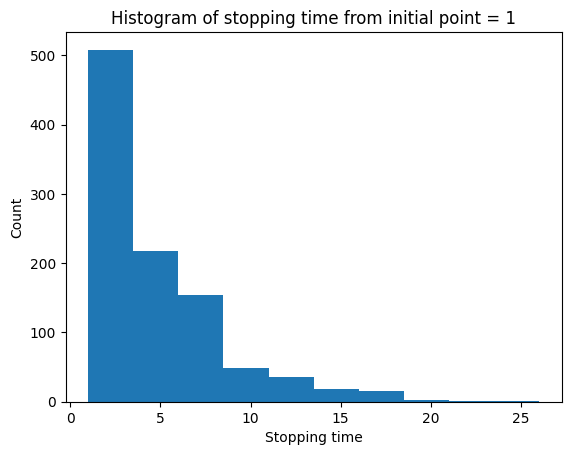

In [34]:
plt.hist(res_1)
plt.xlabel("Stopping time")
plt.ylabel("Count")
plt.title("Histogram of stopping time from initial point = 1");

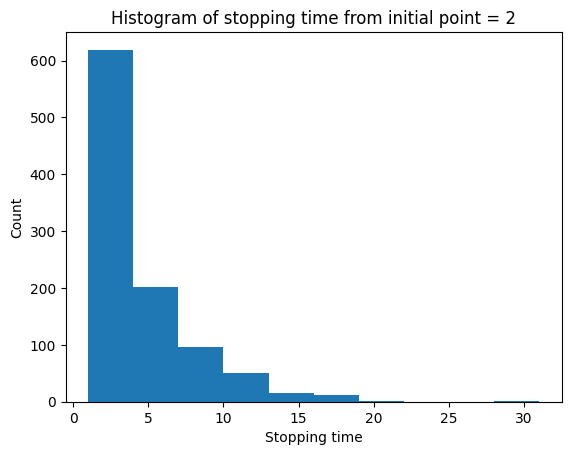

In [35]:
plt.hist(res_2)
plt.xlabel("Stopping time")
plt.ylabel("Count")
plt.title("Histogram of stopping time from initial point = 2");

# 3 (b)
**Calculate the theoretical mean arrival time for absorbing state $X_i = 3$**

We have for each i: $\mathbb{E}[T_i] = 1 + \sum_{j=1}^3 p_{ij}\mathbb{E}[T_j]$

In every case, we can discount $\mathbb{E}[T_3]$ as it equals 0.

This yields:
    
$$\mathbb{E}[T_1] = 1 + 0.2\mathbb{E}[T_1] + 0.7\mathbb{E}[T_2]$$
$$\mathbb{E}[T_2] = 1 + 0.2\mathbb{E}[T_1] + 0.5\mathbb{E}[T_2]$$

Simplifying and combining:

$$\implies \mathbb{E}[T_1] = \frac{5}{4} \left(1 + 0.7\mathbb{E}[T_2] \right)$$

$$\implies \mathbb{E}[T_2] = 2 \left( 1 + 0.2 \left( \frac{5}{4} \left( 1 + 0.7\mathbb{E}[T_2] \right) \right) \right)$$



$$\mathbb{E}[T_2] (1-0.35) = \frac{5}{2} \implies \mathbb{E}[T_2] = \frac{50}{13}$$

Therefore: $$\mathbb{E}[T_1] = \frac{60}{13}$$

This aligns with what we see in our histograms, where the simulation initialised at point 1 in the chain has a higher average stopping time than the simulation initialised at point 2.